In [1]:
# import required libraries

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import datetime as dt

from wordcloud import WordCloud, STOPWORDS

In [2]:
df = pd.read_csv("cleaned-BA-reviews.csv", index_col=0)

#let's also check the index are in order
df = df.reset_index(drop=True)

In [3]:
df.head()

reviews  stars        date  \
0  ✅ Trip Verified |   After an excellent flight ...    5.0  2025-01-01   
1  ✅ Trip Verified |   On a recent flight from Cy...    5.0  2024-12-17   
2  ✅ Trip Verified |   Flight BA 0560 arrived in ...    1.0  2024-12-17   
3  ✅ Trip Verified |   This was the first time I ...    1.0  2024-12-14   
4  ✅ Trip Verified |   Pretty good flight but sti...    2.0  2024-12-13   

          country  verified                                             corpus  
0  United Kingdom      True  excellent flight cpt lhr return good ba moved ...  
1  United Kingdom      True  recent flight cyprus ba second cabin door clos...  
2       Australia      True  flight ba arrived rome december passenger rece...  
3   United States      True  first time flew british airway huge disappoint...  
4  United Kingdom      True  pretty good flight still small thing improved ...

## Average overall rating for British Airways

In [4]:
df.stars.mean()

4.52959679725479

## Total count of each rating

In [5]:
df.stars.value_counts()

stars
1.0     887
2.0     407
3.0     402
8.0     337
10.0    278
7.0     274
9.0     261
5.0     248
4.0     234
6.0     169
Name: count, dtype: int64

Text(0.5, 0.98, 'Counts for each ratings')

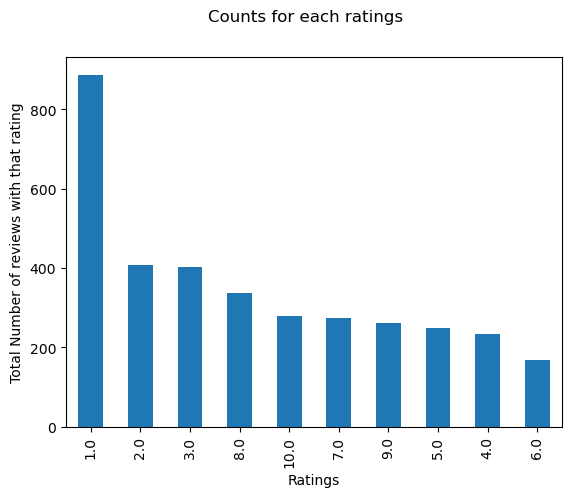

In [6]:
df.stars.value_counts().plot(kind='bar')
plt.xlabel("Ratings")
plt.ylabel("Total Number of reviews with that rating")
plt.suptitle("Counts for each ratings")

In [7]:
df_ratings = pd.DataFrame(df.stars.value_counts()).reset_index()
pct_values = (df_ratings['count'] / df_ratings['count'].sum() * 100).round(2).tolist()
df_ratings['pct_values'] = pct_values

In [8]:
df_ratings

stars  count  pct_values
0    1.0    887       25.36
1    2.0    407       11.64
2    3.0    402       11.50
3    8.0    337        9.64
4   10.0    278        7.95
5    7.0    274        7.84
6    9.0    261        7.46
7    5.0    248        7.09
8    4.0    234        6.69
9    6.0    169        4.83

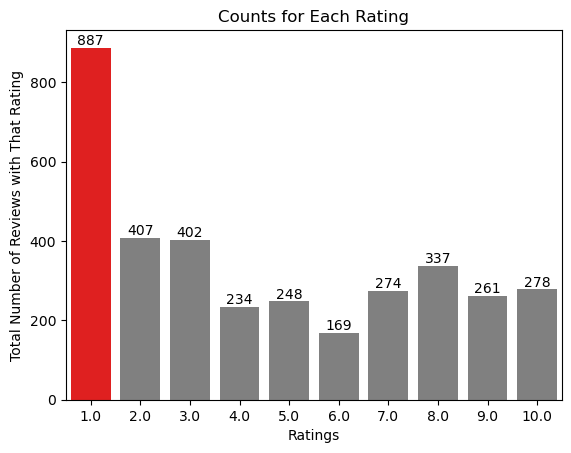

In [9]:
# Generate a color palette where the highest count is 'Red' and others are 'grey'
clrs = ['Red' if x == df_ratings['count'].max() else 'grey' for x in df_ratings['count']]

# Create a bar plot using Seaborn
ax = sns.barplot(x=df_ratings['stars'], y=df_ratings['count'], palette=clrs, errwidth=0)

# Add bar labels to display the counts on each bar
ax.bar_label(ax.containers[0])

# Set labels and title for the plot
ax.set_xlabel("Ratings")
ax.set_ylabel("Total Number of Reviews with That Rating")
ax.set_title("Counts for Each Rating")

# Show the plot
plt.show()


## Unique countries recieved reviews from

In [10]:
print(f"{len(df.country.unique())} unique countries")

71 unique countries


## Which country most review comes from?

In [11]:
df_country_review = pd.DataFrame(df.country.value_counts().head()).reset_index()

In [12]:
df_country_review.rename(columns={'count':'total_reviews'}, inplace=True)
df_country_review

country  total_reviews
0  United Kingdom           2163
1   United States            419
2       Australia            137
3          Canada            110
4         Germany             66

Text(0.5, 1.0, 'Maximum number of review by country')

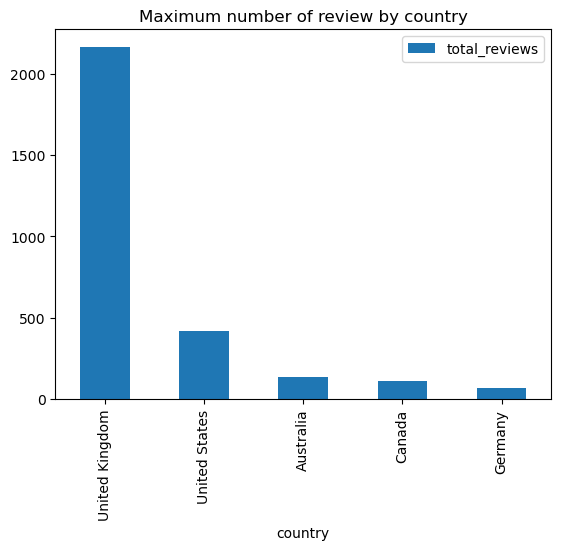

In [13]:
df_country_review.plot(kind="bar", x='country')
plt.title("Maximum number of review by country")

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3497 entries, 0 to 3496
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   reviews   3497 non-null   object        
 1   stars     3497 non-null   float64       
 2   date      3497 non-null   datetime64[ns]
 3   country   3497 non-null   object        
 4   verified  3497 non-null   bool          
 5   corpus    3497 non-null   object        
 6   polarity  3497 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(2), object(3)
memory usage: 167.5+ KB


## Time series analysis

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3497 entries, 0 to 3496
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   reviews   3497 non-null   object 
 1   stars     3497 non-null   float64
 2   date      3497 non-null   object 
 3   country   3497 non-null   object 
 4   verified  3497 non-null   bool   
 5   corpus    3497 non-null   object 
dtypes: bool(1), float64(1), object(4)
memory usage: 140.1+ KB


In [15]:
df.date = pd.to_datetime(df.date)

C:\Users\aswin\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


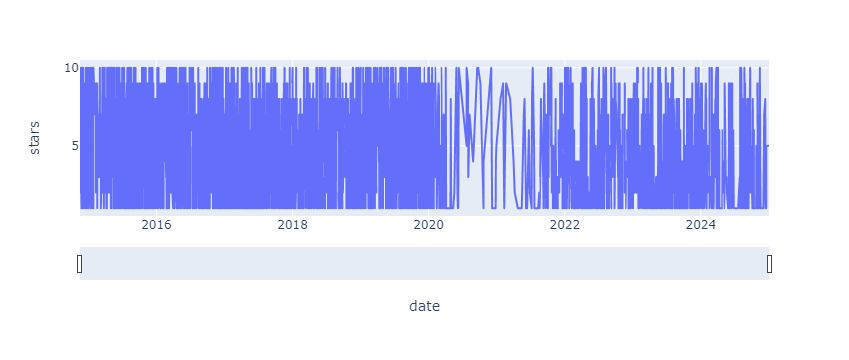

In [16]:
fig = px.line(df, x='date', y="stars")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

It can be seen that between April 2020 to August 2021 there has been a decline in reviews due to Covid Pandemic travel restrictions. Not much can be inferred at this point as the dates we have are the when the customers posted their reviews which does not take into account the actual flight date. Hence no particular significan trend is visible from the plot

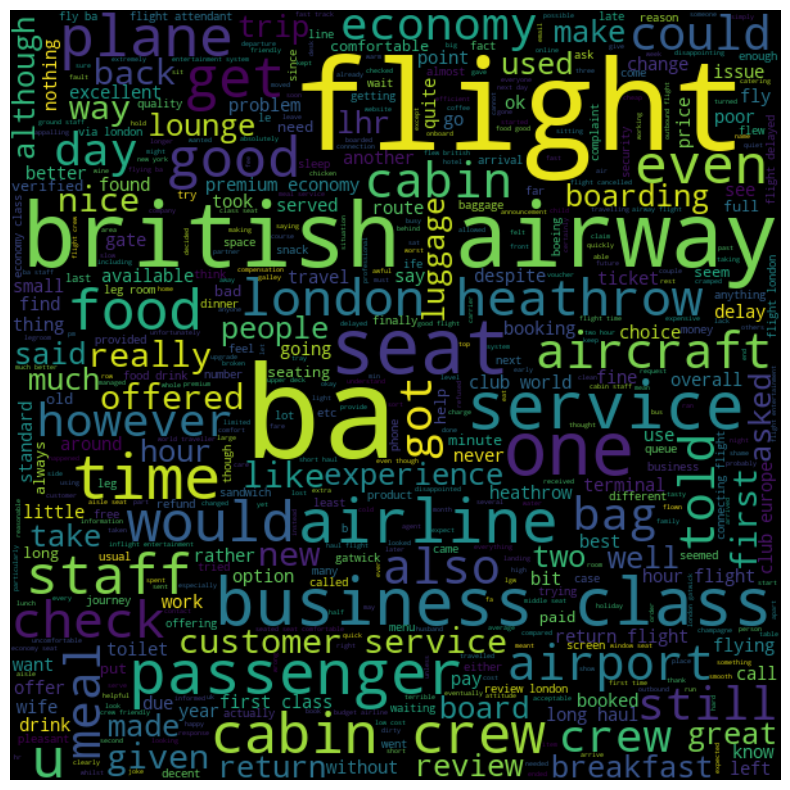

In [17]:
import nltk
from nltk.corpus import stopwords
# Start with one review:
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=500, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

There are many words that does not set the idea of whether the review is positive or negative. For example words like "passenger", "flight", etc. does not add conlcusive value hence we can include them in stopwords list.

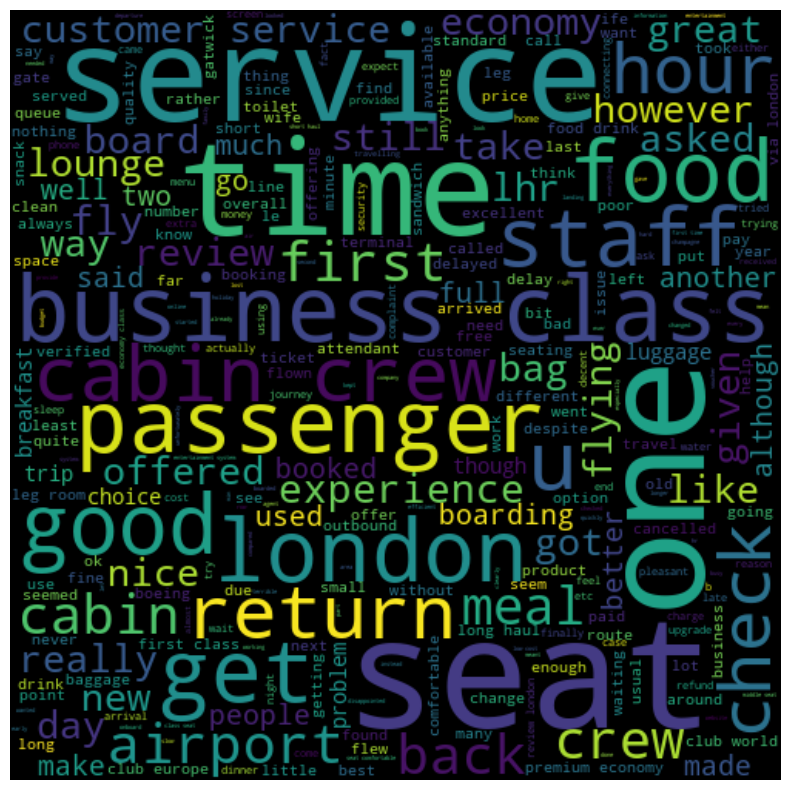

In [18]:
import nltk
from nltk.corpus import stopwords
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))
stopwords.update(["ba","flight", "british","airway", "airline","plane", "told","also","passenger" \
                 "london", "heathrow", "aircraft", "could","even", "would"])
# Create and generate a word cloud image:
wordcloud = WordCloud(height=500,width=500,max_font_size=100, max_words=300, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Word Frequency

In [19]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

#split the text of all reviews into a list of words
words = reviews.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","lhr","review"])


new_words = [word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'seat'),
  Text(1, 0, 'service'),
  Text(2, 0, 'time'),
  Text(3, 0, 'food'),
  Text(4, 0, 'crew'),
  Text(5, 0, 'cabin'),
  Text(6, 0, 'class'),
  Text(7, 0, 'good'),
  Text(8, 0, 'hour'),
  Text(9, 0, 'business'),
  Text(10, 0, 'staff'),
  Text(11, 0, 'economy'),
  Text(12, 0, 'check'),
  Text(13, 0, 'drink'),
  Text(14, 0, 'meal'),
  Text(15, 0, 'lounge'),
  Text(16, 0, 'return'),
  Text(17, 0, 'customer'),
  Text(18, 0, 'club'),
  Text(19, 0, 'boarding')])

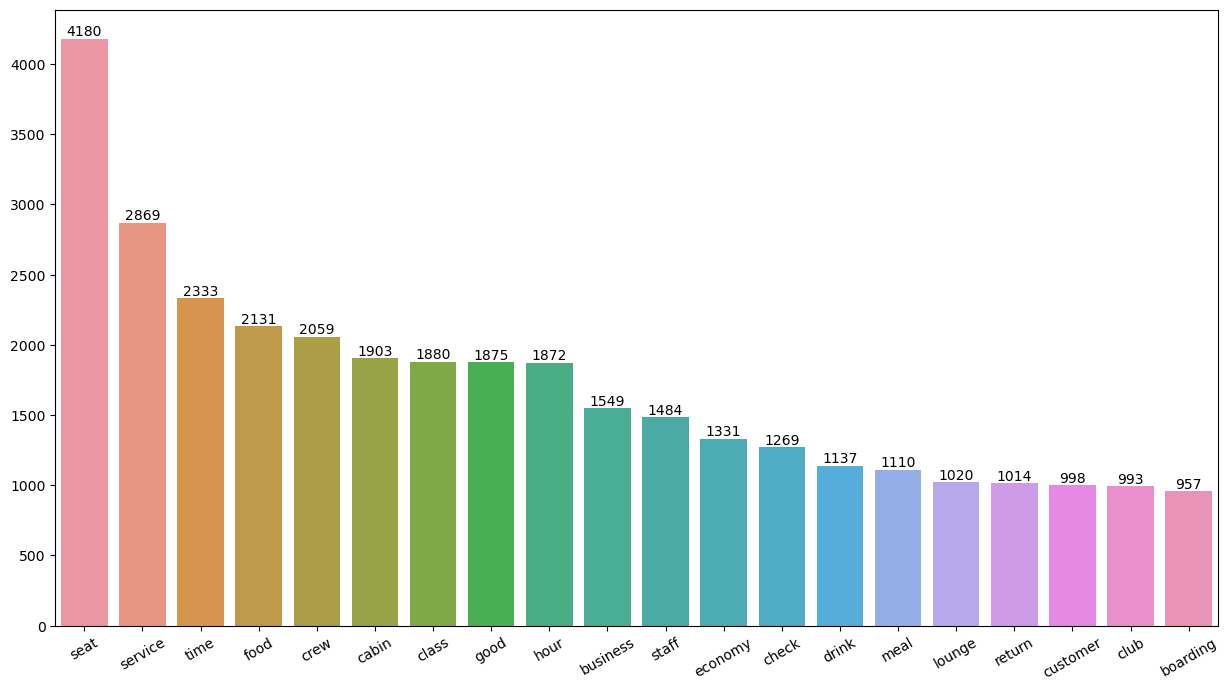

In [20]:
## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15,8))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

We see that "Seat" is most talked about the airline followed by "Service" and "time" which are all very important to customers in terms of service. However, we still do not know is how they are expressing about each of this service. To bring some significane to these terms we will use ngram plots to see if they are bad or good in experience.

## Word Frequency with N-gram

<Axes: >

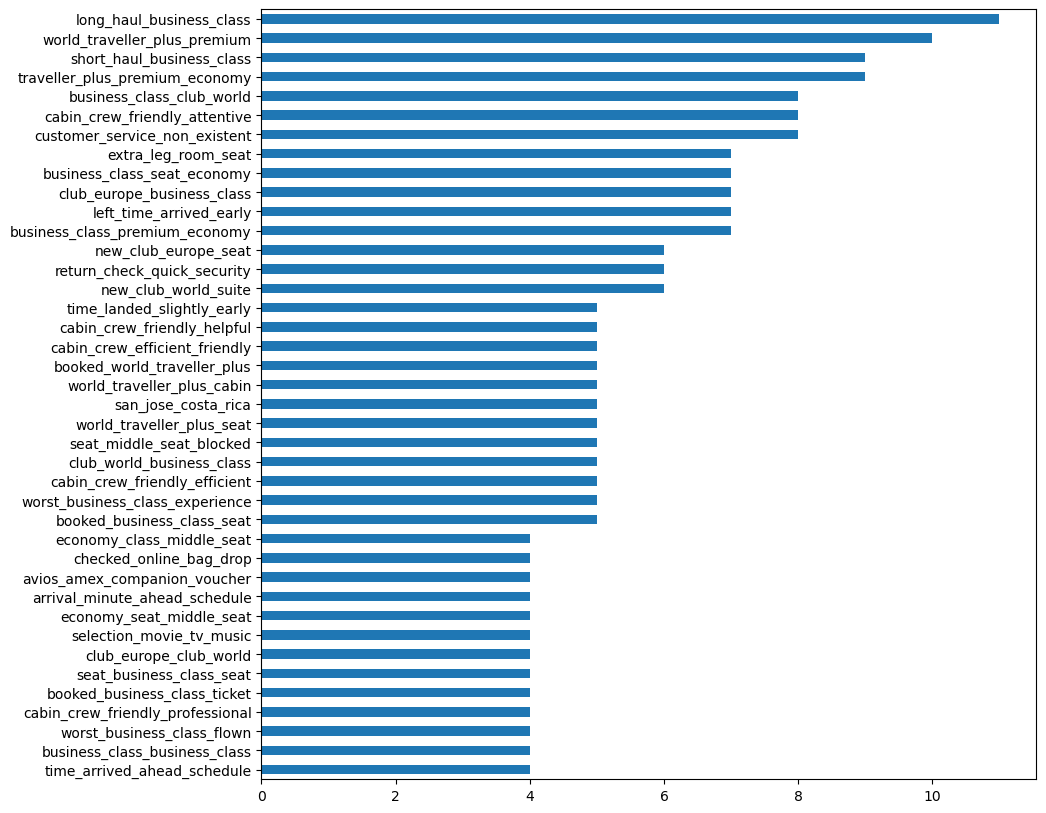

In [21]:
## Imports
import nltk.collocations as collocations
from nltk import FreqDist, bigrams

reviews = " ".join(df.corpus)

#split the text of all reviews into a list of words
words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words,number_of_ngrams ):
    from nltk import ngrams
    
    ## Generate bigrams
    ngrams = ngrams(new_words, number_of_ngrams)

    ## Creating FreqDist
    ngram_fd = FreqDist(ngrams).most_common(40)

    ## Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")
    
    return ax


get_freq_dist(new_words,4)

We can see that there are very common positive terms regarding cabin crew. For example, cabin_crew_friendly_helpful, cabin_crew_friendly_attentive, cabin_crew_efficient_friendly, etc. So certainly customers are providing good reviews about cabin crew staff of British Airways.

We will group the reviews based on ratings. Say, we assume ratigs 1-3 are "bad reviews", 4-6 are "average/good experience" and 7-10 indicates a "great experience".

In [22]:
ratings_1_3 = df[df.stars.isin([1,2,3])]
ratings_4_6 = df[df.stars.isin([4,5,6])]
ratings_7_10 = df[df.stars.isin([7,8,9,10])]

<Axes: >

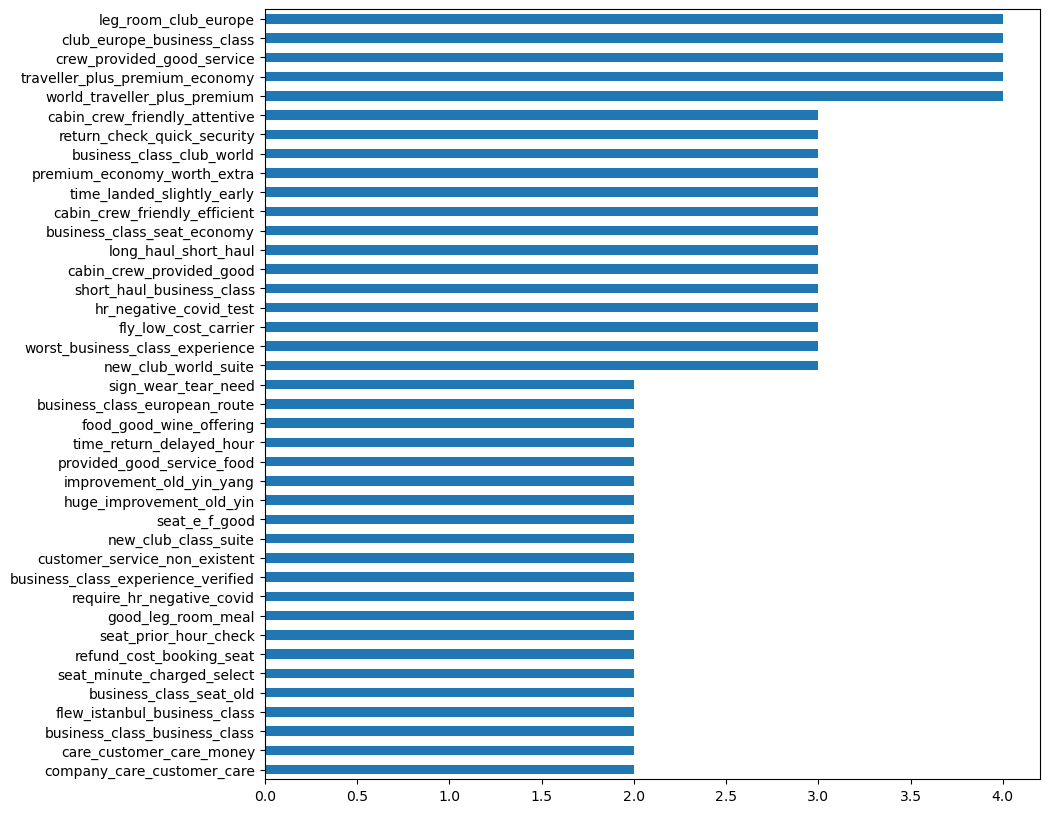

In [23]:
reviews_1_3 = " ".join(ratings_1_3.corpus)
reviews_4_6 = " ".join(ratings_4_6.corpus)
reviews_7_10 = " ".join(ratings_7_10.corpus)

#split the text of all reviews into a list of words
words_1_3 = reviews_1_3.split(" ")
words_4_6 = reviews_4_6.split(" ")
words_7_10 = reviews_7_10.split(" ")


new_words_7_10 = [word for word in words_7_10 if word not in stopwords]

get_freq_dist(new_words_7_10,4)

<Axes: >

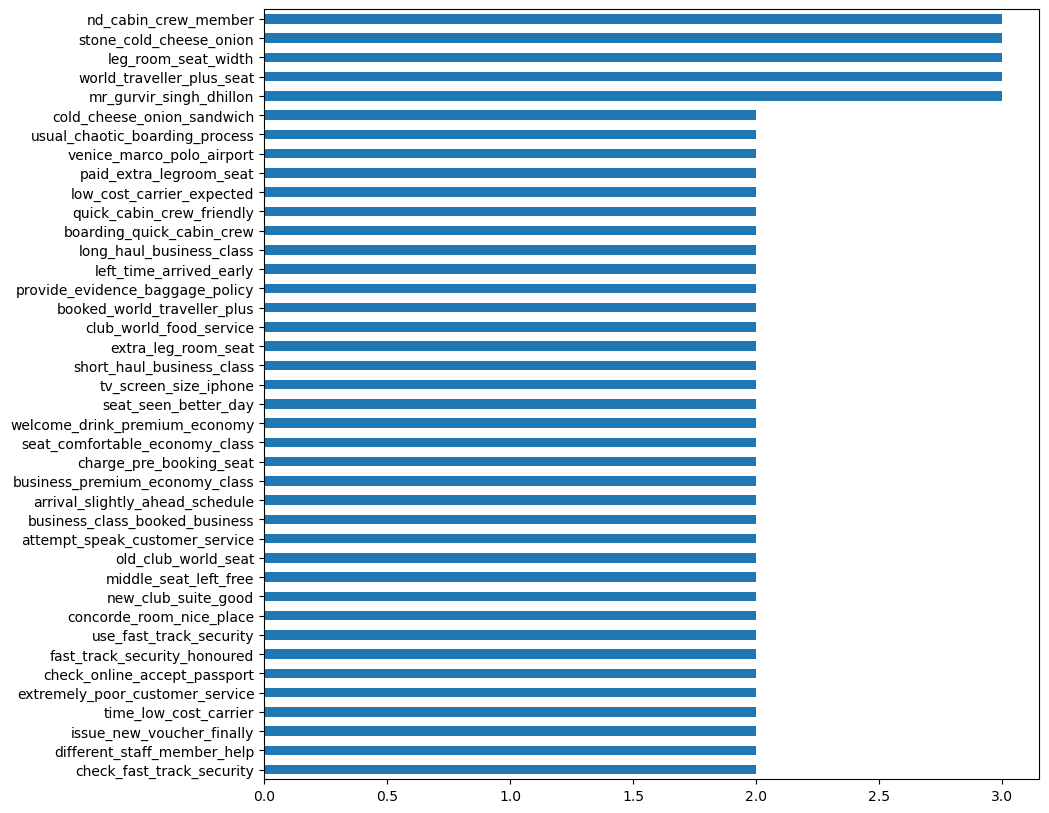

In [24]:
new_words = [word for word in words_4_6 if word not in stopwords]

get_freq_dist(new_words,4)

<Axes: >

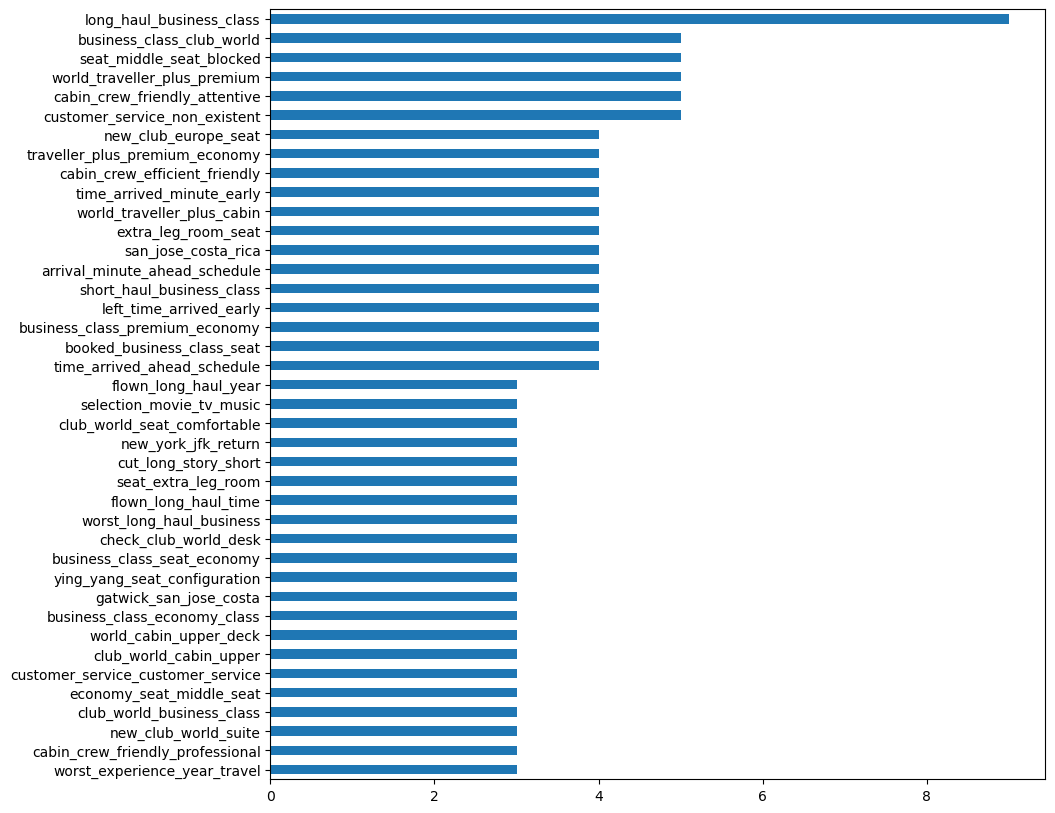

In [25]:
new_words = [word for word in words_1_3 if word not in stopwords]

get_freq_dist(new_words,4)

In [26]:
%%capture
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

#set a column Polarity with all 0 values initially
df['polarity'] = 0

for i in range(len(df.corpus)):
    sent= TextBlob(df.corpus[i])
    polarity  = sent.sentiment.polarity
    subjectivity  = sent.sentiment.subjectivity
    df['polarity'][i] = polarity

In [27]:
# let's see how many texts are with positive comments

print(f"{df[(df['polarity'] >-0.2) & (df['polarity'] <0.2)].shape[0]} number of reviews between -0.2 and 0.2 polarity score")

print(f"{df[(df['polarity'] >-0.1) & (df['polarity'] <0.1)].shape[0]} number of reviews between -0.1 and 0.1 polarity score")

2411 number of reviews between -0.2 and 0.2 polarity score
1411 number of reviews between -0.1 and 0.1 polarity score
